In [50]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
# Load the local dataset
training_set = pd.read_csv(r'train\train.csv') 
testing_set = pd.read_csv(r'test\test.csv')

# Split data into input X and output y
X_train = training_set['text']
y_train = training_set['label']
X_test = testing_set['text']
y_test = testing_set['label']

In [52]:
# Initiate TF-IDF vectorizer
vectorizer = TfidfVectorizer()
tokenized_X_train = vectorizer.fit_transform(X_train)
tokenized_X_test = vectorizer.transform(X_test)

In [53]:
nb_model = MultinomialNB()
nb_model.fit(tokenized_X_train,y_train)

MultinomialNB()

In [54]:
svm_model = LinearSVC()
svm_model.fit(tokenized_X_train,y_train)

LinearSVC()

In [55]:
# Predict
y_pred_nb = nb_model.predict(tokenized_X_test)
y_pred_nb

array([0, 1, 1, ..., 1, 0, 0], shape=(7576,))

In [56]:
# Evaluate
print(classification_report(y_test, y_pred_nb, digits=3))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1-Score:", f1_score(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0      0.901     0.892     0.896      3748
           1      0.895     0.904     0.900      3828

    accuracy                          0.898      7576
   macro avg      0.898     0.898     0.898      7576
weighted avg      0.898     0.898     0.898      7576

Accuracy: 0.8980992608236537
Precision: 0.8950361944157187
Recall: 0.9043887147335423
F1-Score: 0.8996881496881497


In [57]:
from sklearn.metrics import confusion_matrix

# y_true: true labels
# y_pred: predicted labels
cm = confusion_matrix(y_test, y_pred_nb)
cm

array([[3342,  406],
       [ 366, 3462]])

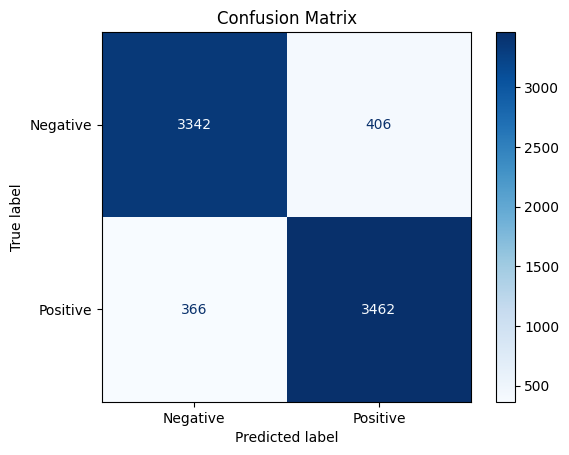

In [58]:
# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [59]:
# Predict
y_pred_svm = svm_model.predict(tokenized_X_test)
y_pred_svm

array([0, 1, 1, ..., 0, 0, 0], shape=(7576,))

In [60]:
# Evaluate
print(classification_report(y_test, y_pred_svm, digits=3))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1-Score:", f1_score(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0      0.912     0.912     0.912      3748
           1      0.914     0.914     0.914      3828

    accuracy                          0.913      7576
   macro avg      0.913     0.913     0.913      7576
weighted avg      0.913     0.913     0.913      7576

Accuracy: 0.9130147835269271
Precision: 0.9135995823544767
Recall: 0.9143155694879833
F1-Score: 0.9139574356965662


In [61]:
from sklearn.metrics import confusion_matrix

# y_true: true labels
# y_pred: predicted labels
cm = confusion_matrix(y_test, y_pred_svm)
cm

array([[3417,  331],
       [ 328, 3500]])

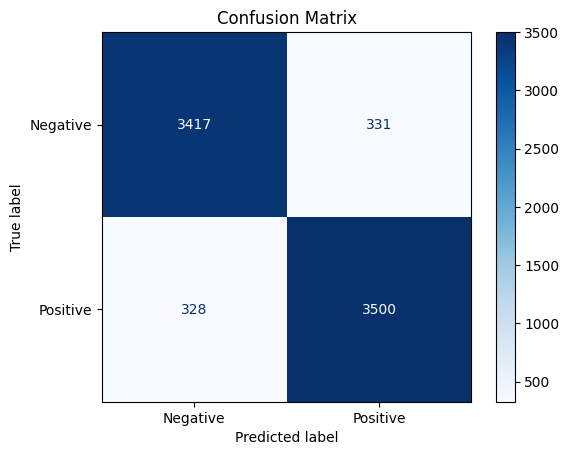

In [62]:
# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()